In [10]:
!pip install autogluon

1. Loading MIMIC-IV Sepsis Dataset...
Dataset shape: (7309, 51)

Columns: ['stay_id', 'subject_id', 'label', 'admission_age', 'is_elderly', 'gender', 'is_male', 'hr_mean', 'hr_min', 'hr_max', 'hr_std', 'hr_mean_age_adjusted', 'sbp_mean', 'sbp_min', 'sbp_max', 'sbp_std', 'dbp_mean', 'dbp_min', 'dbp_max', 'dbp_std', 'map_mean', 'map_min', 'map_max', 'map_std', 'rr_mean', 'rr_min', 'rr_max', 'rr_std', 'temp_mean', 'temp_min', 'temp_max', 'temp_std', 'temp_mean_f', 'temp_max_f', 'spo2_mean', 'spo2_min', 'spo2_max', 'spo2_std', 'gcs_mean', 'gcs_min', 'gcs_max', 'gcs_std', 'shock_index_mean', 'shock_index_max', 'pulse_pressure_mean', 'pulse_pressure_min', 'pulse_pressure_max', 'age_hr_interaction', 'age_sbp_interaction', 'vital_count', 'unique_vital_times']

Class distribution:
Sepsis cases (label=1): 3425
Non-sepsis cases (label=0): 3884
Percentage sepsis: 46.9%

2. Preparing Data for AutoGluon...

Missing values per column:
                  column  missing_count  missing_pct
gcs_min      

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       8.14 GB / 12.67 GB (64.2%)
Disk Space Avail:   69.45 GB / 112.64 GB (61.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacke

Training set size: 5847
Test set size: 1462

Training set class distribution:
label
no_sepsis    3107
sepsis       2740
Name: count, dtype: int64

4. Training AutoGluon Models (Quick Mode)...


Leaderboard on holdout data (DyStack):
                   model  score_holdout  score_val eval_metric  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L1       0.811205   0.792729     roc_auc        0.115890       0.094351   45.369029                 0.115890                0.094351          45.369029            1       True          3
1      LightGBMXT_BAG_L2       0.809817   0.800053     roc_auc        0.436910       0.537110  144.832439                 0.214733                0.102708          48.151907            2       True          6
2    WeightedEnsemble_L3       0.808192   0.803694     roc_auc        0.441545       0.538691  144.947372                 0.004635                0.001581           0.114933            3       True          7
3    WeightedEnsemble_L2       0.804970   0.801248     roc_auc        0.181795       0.139871   96.790523                 0.0


5. Evaluating Quick Model...

Test ROC-AUC: 0.7928

Detailed metrics:
roc_auc: 0.7928
accuracy: 0.7093
balanced_accuracy: 0.7135
mcc: 0.4288
f1: 0.7157
precision: 0.6605
recall: 0.7810

6. Model Leaderboard...


These features in provided data are not utilized by the predictor and will be ignored: ['is_male', 'gcs_min', 'gcs_max']
Computing feature importance via permutation shuffling for 45 features using 1462 rows with 5 shuffle sets...



Top 5 models:
                 model  score_test  score_val  pred_time_test    fit_time
0       XGBoost_BAG_L1    0.799194   0.797518        0.097662   23.299804
1    LightGBMXT_BAG_L2    0.798425   0.801505        1.587293  334.842757
2      LightGBM_BAG_L1    0.797710   0.798340        0.073556   43.961292
3    LightGBMXT_BAG_L1    0.797635   0.799491        0.128590   43.477681
4  WeightedEnsemble_L2    0.797630   0.805900        0.783135  210.319834

7. Feature Importance Analysis...


	637.93s	= Expected runtime (127.59s per shuffle set)
	204.29s	= Actual runtime (Completed 5 of 5 shuffle sets)



Top 15 most important features:
                     importance    stddev   p_value  n  p99_high   p99_low
vital_count            0.021789  0.002520  0.000021  5  0.026977  0.016601
unique_vital_times     0.018728  0.001666  0.000007  5  0.022157  0.015299
gcs_std                0.008294  0.003193  0.002185  5  0.014868  0.001720
gcs_mean               0.008210  0.003210  0.002314  5  0.014820  0.001600
hr_min                 0.002498  0.000781  0.001012  5  0.004106  0.000889
hr_mean                0.002258  0.000951  0.003029  5  0.004217  0.000299
gender                 0.001679  0.001545  0.035994  5  0.004859 -0.001502
hr_max                 0.001114  0.000601  0.007158  5  0.002352 -0.000123
hr_std                 0.000933  0.000971  0.049067  5  0.002933 -0.001066
is_elderly             0.000776  0.000706  0.034939  5  0.002230 -0.000678
pulse_pressure_mean    0.000702  0.001117  0.116392  5  0.003002 -0.001598
pulse_pressure_max     0.000629  0.001709  0.228249  5  0.004147 -0

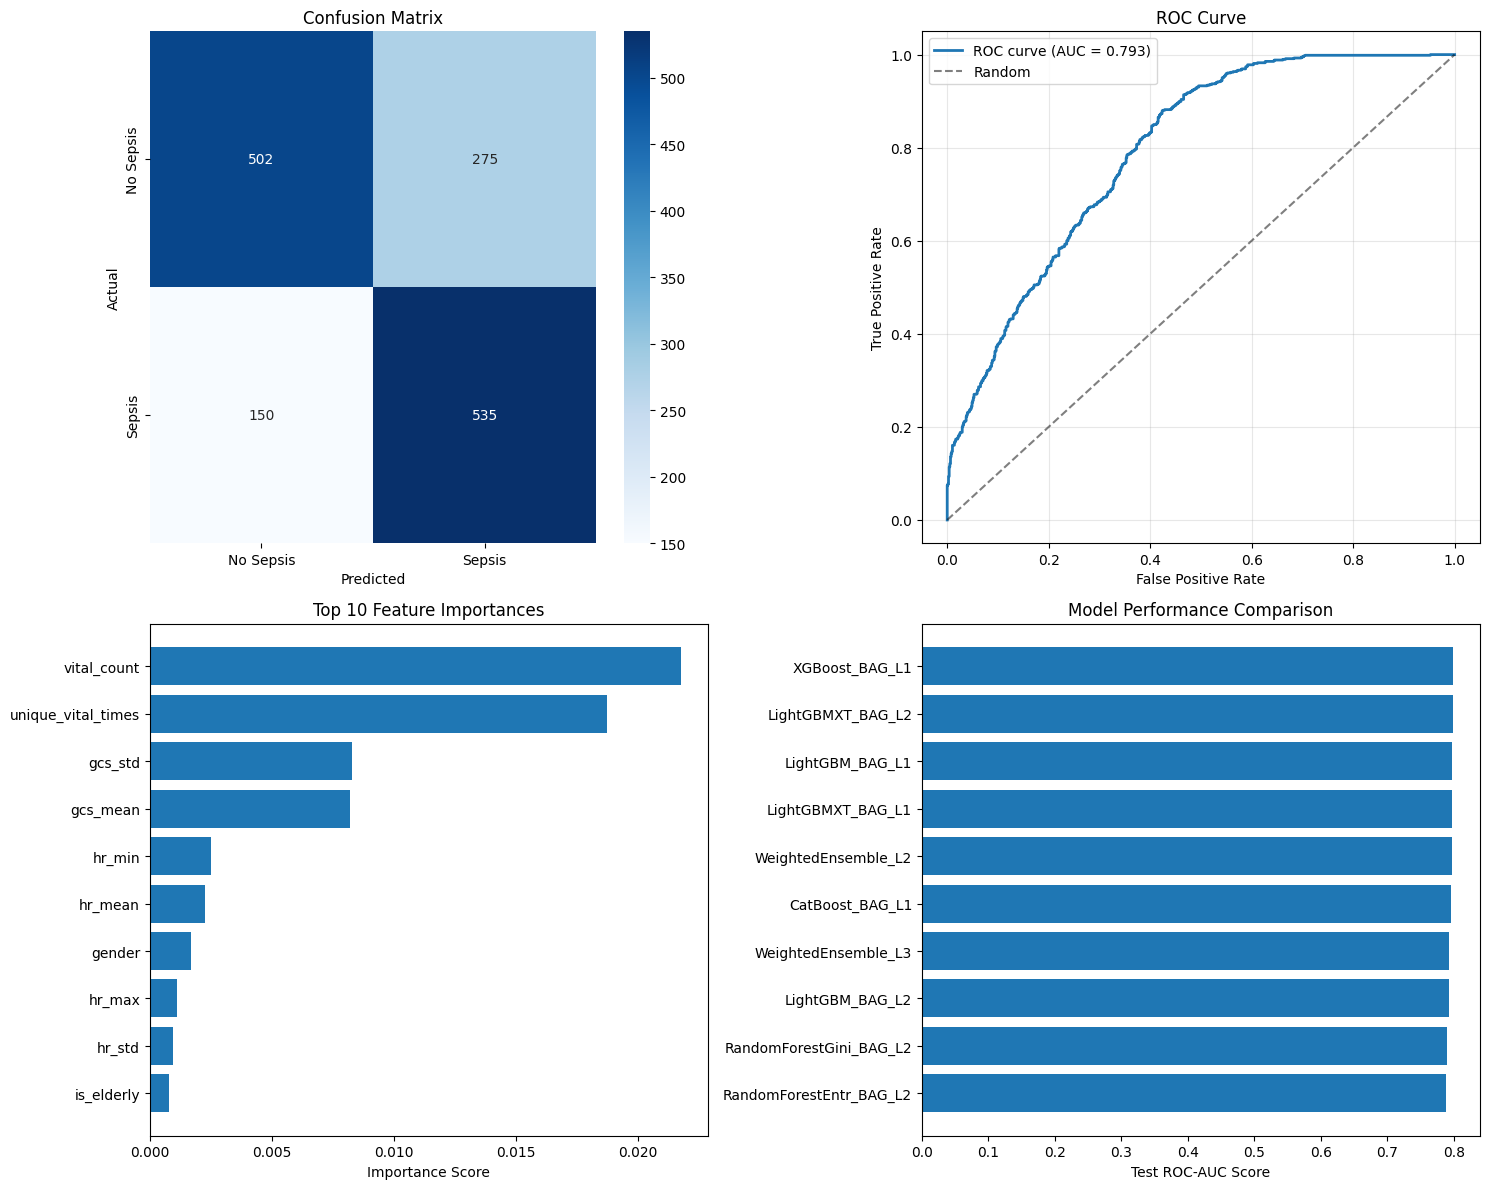

These features in provided data are not utilized by the predictor and will be ignored: ['is_male', 'gcs_min', 'gcs_max']
Computing feature importance via permutation shuffling for 45 features using 1462 rows with 35 shuffle sets...



10. Model Interpretation...

Feature importance (permutation-based):


	5517.91s	= Expected runtime (157.65s per shuffle set)
	1406.28s	= Actual runtime (Completed 35 of 35 shuffle sets)


                    importance    stddev       p_value   n  p99_high   p99_low
vital_count           0.022810  0.003991  4.642324e-28  35  0.024651  0.020970
unique_vital_times    0.019482  0.003600  2.827140e-27  35  0.021142  0.017822
gcs_std               0.007825  0.002429  5.013933e-20  35  0.008945  0.006705
gcs_mean              0.007491  0.002568  1.075147e-18  35  0.008675  0.006307
gender                0.001448  0.001246  3.239758e-08  35  0.002022  0.000873
hr_min                0.001354  0.001846  6.084554e-05  35  0.002205  0.000502
hr_std                0.001253  0.002424  2.160222e-03  35  0.002371  0.000135
hr_mean               0.001250  0.001520  1.295521e-05  35  0.001951  0.000548
sbp_max               0.000933  0.001157  1.711825e-05  35  0.001466  0.000399
map_std               0.000760  0.001014  4.626394e-05  35  0.001228  0.000292

11. Saving Predictions...

High-risk patients (probability > 0.7): 232
Predictions saved to 'autogluon_predictions.csv'

12. Produ

In [ ]:
# AutoGluon Sepsis Prediction Pipeline
# AutoGluon automatically handles missing values, feature engineering, and model selection

import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

# 1. Load the data
print("=" * 60)
print("1. Loading MIMIC-IV Sepsis Dataset...")
print("=" * 60)

df = pd.read_csv('/content/bquxjob_73282501_19811b4e38f.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

# Check class distribution
print(f"\nClass distribution:")
print(f"Sepsis cases (label=1): {df['label'].sum()}")
print(f"Non-sepsis cases (label=0): {len(df) - df['label'].sum()}")
print(f"Percentage sepsis: {df['label'].mean()*100:.1f}%")

# 2. Data Preparation
print("\n" + "=" * 60)
print("2. Preparing Data for AutoGluon...")
print("=" * 60)

# Convert label to string for AutoGluon (it handles classification better this way)
df['label'] = df['label'].map({0: 'no_sepsis', 1: 'sepsis'})

# Remove ID columns (AutoGluon will handle the rest)
id_cols = ['stay_id', 'subject_id']
df_model = df.drop(columns=id_cols)

# Show missing value statistics
print("\nMissing values per column:")
missing_stats = pd.DataFrame({
    'column': df_model.columns,
    'missing_count': df_model.isnull().sum(),
    'missing_pct': (df_model.isnull().sum() / len(df_model) * 100).round(2)
}).sort_values('missing_pct', ascending=False)
print(missing_stats[missing_stats['missing_pct'] > 0].head(10))

# 3. Train-Test Split
print("\n" + "=" * 60)
print("3. Splitting Data...")
print("=" * 60)

# Split data
train_data, test_data = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42,
    stratify=df_model['label']
)

print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")
print(f"\nTraining set class distribution:")
print(train_data['label'].value_counts())

# 4. AutoGluon Training - Quick Mode
print("\n" + "=" * 60)
print("4. Training AutoGluon Models (Quick Mode)...")
print("=" * 60)

# Create predictor with optimized settings for sepsis prediction
predictor_quick = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',  # Optimize for AUC
    path='autogluon_sepsis_quick'
)

# Train with quick preset (fast training, good for initial results)
predictor_quick.fit(
    train_data=train_data,
    time_limit=600,  # 5 minutes
    presets='best_quality',  # Use 'best_quality' for better results
    verbosity=2,
    ag_args_fit={
        'num_gpus': 1,  # Set to 1 if you have GPU
    }
)

# 5. Evaluate Quick Model
print("\n" + "=" * 60)
print("5. Evaluating Quick Model...")
print("=" * 60)

# Get predictions
y_test = test_data['label']
y_pred = predictor_quick.predict(test_data)
y_pred_proba = predictor_quick.predict_proba(test_data)['sepsis']

# Calculate metrics
test_auc = roc_auc_score(y_test == 'sepsis', y_pred_proba)
print(f"\nTest ROC-AUC: {test_auc:.4f}")

# Detailed evaluation
eval_metrics = predictor_quick.evaluate(test_data, silent=True)
print("\nDetailed metrics:")
for metric, value in eval_metrics.items():
    print(f"{metric}: {value:.4f}")

# 6. Model Leaderboard
print("\n" + "=" * 60)
print("6. Model Leaderboard...")
print("=" * 60)

leaderboard = predictor_quick.leaderboard(test_data, silent=True)
print("\nTop 5 models:")
print(leaderboard[['model', 'score_test', 'score_val', 'pred_time_test', 'fit_time']].head())

# 7. Feature Importance
print("\n" + "=" * 60)
print("7. Feature Importance Analysis...")
print("=" * 60)

importance = predictor_quick.feature_importance(test_data)
print("\nTop 15 most important features:")
print(importance.head(15))

# 8. Advanced Training (Optional - takes longer)
print("\n" + "=" * 60)
print("8. Training Advanced AutoGluon Models (Optional)...")
print("=" * 60)

# Uncomment the following section for more thorough training
"""
# Create advanced predictor
predictor_advanced = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',
    path='autogluon_sepsis_advanced'
)

# Define custom hyperparameters for better performance
hyperparameters = {
    'GBM': [
        {'num_boost_round': 100, 'learning_rate': 0.1},
        {'num_boost_round': 200, 'learning_rate': 0.05},
    ],
    'XGB': [
        {'n_estimators': 100, 'learning_rate': 0.1},
        {'n_estimators': 200, 'learning_rate': 0.05},
    ],
    'CAT': {},  # CatBoost
    'NN_TORCH': {},  # Neural Network
    'RF': [
        {'n_estimators': 100},
        {'n_estimators': 200},
    ],
}

# Train with custom settings
predictor_advanced.fit(
    train_data=train_data,
    time_limit=1800,  # 30 minutes
    presets='best_quality',
    hyperparameters=hyperparameters,
    num_bag_folds=5,  # 5-fold bagging
    num_stack_levels=1,  # Enable stacking
    verbosity=2
)

# Evaluate advanced model
y_pred_adv = predictor_advanced.predict(test_data)
y_pred_proba_adv = predictor_advanced.predict_proba(test_data)['sepsis']
test_auc_adv = roc_auc_score(y_test == 'sepsis', y_pred_proba_adv)
print(f"\nAdvanced Model Test ROC-AUC: {test_auc_adv:.4f}")
"""

# 9. Visualization
print("\n" + "=" * 60)
print("9. Creating Visualizations...")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 9.1 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['No Sepsis', 'Sepsis'],
            yticklabels=['No Sepsis', 'Sepsis'])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 9.2 ROC Curve
fpr, tpr, _ = roc_curve(y_test == 'sepsis', y_pred_proba)
axes[0, 1].plot(fpr, tpr, label=f'ROC curve (AUC = {test_auc:.3f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random', alpha=0.5)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 9.3 Feature Importance
top_features = importance.head(10)
axes[1, 0].barh(range(len(top_features)), top_features['importance'])
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features.index)
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_title('Top 10 Feature Importances')
axes[1, 0].invert_yaxis()

# 9.4 Model Performance Comparison
model_scores = leaderboard[['model', 'score_test']].head(10)
axes[1, 1].barh(range(len(model_scores)), model_scores['score_test'])
axes[1, 1].set_yticks(range(len(model_scores)))
axes[1, 1].set_yticklabels(model_scores['model'])
axes[1, 1].set_xlabel('Test ROC-AUC Score')
axes[1, 1].set_title('Model Performance Comparison')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('autogluon_sepsis_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. Model Interpretation
print("\n" + "=" * 60)
print("10. Model Interpretation...")
print("=" * 60)

# Get feature importance with different methods
print("\nFeature importance (permutation-based):")
try:
    perm_importance = predictor_quick.feature_importance(
        test_data,
        num_shuffle_sets=35,
        subsample_size=3000
    )
    print(perm_importance.head(10))
except:
    print("Permutation importance calculation skipped (may take long time)")

# 11. Save Predictions for Analysis
print("\n" + "=" * 60)
print("11. Saving Predictions...")
print("=" * 60)

# Create results dataframe
results = test_data.copy()
results['predicted'] = y_pred
results['sepsis_probability'] = y_pred_proba
results['correct'] = (results['label'] == results['predicted']).astype(int)

# Save high-risk patients
high_risk = results[results['sepsis_probability'] > 0.7].sort_values('sepsis_probability', ascending=False)
print(f"\nHigh-risk patients (probability > 0.7): {len(high_risk)}")

# Save results
results.to_csv('autogluon_predictions.csv', index=False)
print("Predictions saved to 'autogluon_predictions.csv'")

# 12. Production Deployment Example
print("\n" + "=" * 60)
print("12. Production Deployment Example...")
print("=" * 60)

def predict_sepsis_risk(patient_vitals, model_path='autogluon_sepsis_quick'):
    """
    Predict sepsis risk for new patients using trained AutoGluon model

    Args:
        patient_vitals: DataFrame with vital sign columns (can have missing values)
        model_path: Path to saved AutoGluon model

    Returns:
        DataFrame with predictions and risk scores
    """
    # Load predictor
    predictor = TabularPredictor.load(model_path)

    # Get predictions
    predictions = predictor.predict(patient_vitals)
    probabilities = predictor.predict_proba(patient_vitals)

    # Create results
    results = pd.DataFrame({
        'prediction': predictions,
        'sepsis_risk_score': probabilities['sepsis'],
        'risk_category': pd.cut(
            probabilities['sepsis'],
            bins=[0, 0.3, 0.7, 1.0],
            labels=['Low', 'Medium', 'High']
        )
    })

    return results

# Example usage
print("\nExample prediction for new patients:")
example_patients = pd.DataFrame({
    'hr_mean': [95, 120, 70],
    'sbp_mean': [110, 85, 130],
    'rr_mean': [18, 28, 16],
    'temp_mean': [37.2, 38.5, 36.8],
    'spo2_mean': [95, 88, 98],
    # ... other features (can be missing)
})

try:
    risk_scores = predict_sepsis_risk(example_patients)
    print(risk_scores)
except:
    print("Example requires all feature columns from training data")

# 13. Summary Report
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)
print(f"\n✅ Model Training Complete!")
print(f"📊 Best Model: {leaderboard.iloc[0]['model']}")
print(f"🎯 Test ROC-AUC: {test_auc:.4f}")
print(f"⏱️  Total Training Time: {leaderboard['fit_time'].sum():.1f} seconds")
print(f"💾 Model saved to: ./autogluon_sepsis_quick/")
print(f"\n🔮 This model predicts sepsis 12 hours before onset")
print(f"🏥 Based on vital signs from 15-minute windows")

# Print classification report
print("\n" + "=" * 60)
print("Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['No Sepsis', 'Sepsis']))

print("\n" + "=" * 60)
print("AutoGluon pipeline completed successfully!")
print("=" * 60)

In [17]:
# AutoGluon Sepsis Prediction Pipeline
# AutoGluon automatically handles missing values, feature engineering, and model selection

import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

# 1. Load the data
print("=" * 60)
print("1. Loading MIMIC-IV Sepsis Dataset...")
print("=" * 60)

df = pd.read_csv('/content/bquxjob_6e690c1d_19814f99b1b.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

# Check class distribution
print(f"\nClass distribution:")
print(f"Sepsis cases (label=1): {df['label'].sum()}")
print(f"Non-sepsis cases (label=0): {len(df) - df['label'].sum()}")
print(f"Percentage sepsis: {df['label'].mean()*100:.1f}%")

# 2. Data Preparation
print("\n" + "=" * 60)
print("2. Preparing Data for AutoGluon...")
print("=" * 60)

# Convert label to string for AutoGluon (it handles classification better this way)
df['label'] = df['label'].map({0: 'no_sepsis', 1: 'sepsis'})

# Remove ID columns (AutoGluon will handle the rest)
id_cols = ['stay_id', 'subject_id']
df_model = df.drop(columns=id_cols)

# Show missing value statistics
print("\nMissing values per column:")
missing_stats = pd.DataFrame({
    'column': df_model.columns,
    'missing_count': df_model.isnull().sum(),
    'missing_pct': (df_model.isnull().sum() / len(df_model) * 100).round(2)
}).sort_values('missing_pct', ascending=False)
print(missing_stats[missing_stats['missing_pct'] > 0].head(10))

# 3. Train-Test Split
print("\n" + "=" * 60)
print("3. Splitting Data...")
print("=" * 60)

# Split data
train_data, test_data = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42,
    stratify=df_model['label']
)

print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")
print(f"\nTraining set class distribution:")
print(train_data['label'].value_counts())

# 4. AutoGluon Training - Quick Mode
print("\n" + "=" * 60)
print("4. Training AutoGluon Models (Quick Mode)...")
print("=" * 60)

# Create predictor with optimized settings for sepsis prediction
predictor_quick = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',  # Optimize for AUC
    path='autogluon_sepsis_quick'
)

# Train with quick preset (fast training, good for initial results)
predictor_quick.fit(
    train_data=train_data,
    time_limit=600,  # 5 minutes
    presets='best_quality',  # Use 'best_quality' for better results
    verbosity=2,
    ag_args_fit={
        'num_gpus': 1,  # Set to 1 if you have GPU
    }
)

# 5. Evaluate Quick Model
print("\n" + "=" * 60)
print("5. Evaluating Quick Model...")
print("=" * 60)

# Get predictions
y_test = test_data['label']
y_pred = predictor_quick.predict(test_data)
y_pred_proba = predictor_quick.predict_proba(test_data)['sepsis']

# Calculate metrics
test_auc = roc_auc_score(y_test == 'sepsis', y_pred_proba)
print(f"\nTest ROC-AUC: {test_auc:.4f}")

# Detailed evaluation
eval_metrics = predictor_quick.evaluate(test_data, silent=True)
print("\nDetailed metrics:")
for metric, value in eval_metrics.items():
    print(f"{metric}: {value:.4f}")

# 6. Model Leaderboard
print("\n" + "=" * 60)
print("6. Model Leaderboard...")
print("=" * 60)

leaderboard = predictor_quick.leaderboard(test_data, silent=True)
print("\nTop 5 models:")
print(leaderboard[['model', 'score_test', 'score_val', 'pred_time_test', 'fit_time']].head())

# 7. Feature Importance
print("\n" + "=" * 60)
print("7. Feature Importance Analysis...")
print("=" * 60)

importance = predictor_quick.feature_importance(test_data)
print("\nTop 15 most important features:")
print(importance.head(15))

# 8. Advanced Training (Optional - takes longer)
print("\n" + "=" * 60)
print("8. Training Advanced AutoGluon Models (Optional)...")
print("=" * 60)

# Uncomment the following section for more thorough training
"""
# Create advanced predictor
predictor_advanced = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',
    path='autogluon_sepsis_advanced'
)

# Define custom hyperparameters for better performance
hyperparameters = {
    'GBM': [
        {'num_boost_round': 100, 'learning_rate': 0.1},
        {'num_boost_round': 200, 'learning_rate': 0.05},
    ],
    'XGB': [
        {'n_estimators': 100, 'learning_rate': 0.1},
        {'n_estimators': 200, 'learning_rate': 0.05},
    ],
    'CAT': {},  # CatBoost
    'NN_TORCH': {},  # Neural Network
    'RF': [
        {'n_estimators': 100},
        {'n_estimators': 200},
    ],
}

# Train with custom settings
predictor_advanced.fit(
    train_data=train_data,
    time_limit=1800,  # 30 minutes
    presets='best_quality',
    hyperparameters=hyperparameters,
    num_bag_folds=5,  # 5-fold bagging
    num_stack_levels=1,  # Enable stacking
    verbosity=2
)

# Evaluate advanced model
y_pred_adv = predictor_advanced.predict(test_data)
y_pred_proba_adv = predictor_advanced.predict_proba(test_data)['sepsis']
test_auc_adv = roc_auc_score(y_test == 'sepsis', y_pred_proba_adv)
print(f"\nAdvanced Model Test ROC-AUC: {test_auc_adv:.4f}")
"""

# 9. Visualization
print("\n" + "=" * 60)
print("9. Creating Visualizations...")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 9.1 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['No Sepsis', 'Sepsis'],
            yticklabels=['No Sepsis', 'Sepsis'])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 9.2 ROC Curve
fpr, tpr, _ = roc_curve(y_test == 'sepsis', y_pred_proba)
axes[0, 1].plot(fpr, tpr, label=f'ROC curve (AUC = {test_auc:.3f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random', alpha=0.5)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 9.3 Feature Importance
top_features = importance.head(10)
axes[1, 0].barh(range(len(top_features)), top_features['importance'])
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features.index)
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_title('Top 10 Feature Importances')
axes[1, 0].invert_yaxis()

# 9.4 Model Performance Comparison
model_scores = leaderboard[['model', 'score_test']].head(10)
axes[1, 1].barh(range(len(model_scores)), model_scores['score_test'])
axes[1, 1].set_yticks(range(len(model_scores)))
axes[1, 1].set_yticklabels(model_scores['model'])
axes[1, 1].set_xlabel('Test ROC-AUC Score')
axes[1, 1].set_title('Model Performance Comparison')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('autogluon_sepsis_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. Model Interpretation
print("\n" + "=" * 60)
print("10. Model Interpretation...")
print("=" * 60)

# Get feature importance with different methods
print("\nFeature importance (permutation-based):")
try:
    perm_importance = predictor_quick.feature_importance(
        test_data,
        num_shuffle_sets=35,
        subsample_size=3000
    )
    print(perm_importance.head(10))
except:
    print("Permutation importance calculation skipped (may take long time)")

# 11. Save Predictions for Analysis
print("\n" + "=" * 60)
print("11. Saving Predictions...")
print("=" * 60)

# Create results dataframe
results = test_data.copy()
results['predicted'] = y_pred
results['sepsis_probability'] = y_pred_proba
results['correct'] = (results['label'] == results['predicted']).astype(int)

# Save high-risk patients
high_risk = results[results['sepsis_probability'] > 0.7].sort_values('sepsis_probability', ascending=False)
print(f"\nHigh-risk patients (probability > 0.7): {len(high_risk)}")

# Save results
results.to_csv('autogluon_predictions.csv', index=False)
print("Predictions saved to 'autogluon_predictions.csv'")

# 12. Production Deployment Example
print("\n" + "=" * 60)
print("12. Production Deployment Example...")
print("=" * 60)

def predict_sepsis_risk(patient_vitals, model_path='autogluon_sepsis_quick'):
    """
    Predict sepsis risk for new patients using trained AutoGluon model

    Args:
        patient_vitals: DataFrame with vital sign columns (can have missing values)
        model_path: Path to saved AutoGluon model

    Returns:
        DataFrame with predictions and risk scores
    """
    # Load predictor
    predictor = TabularPredictor.load(model_path)

    # Get predictions
    predictions = predictor.predict(patient_vitals)
    probabilities = predictor.predict_proba(patient_vitals)

    # Create results
    results = pd.DataFrame({
        'prediction': predictions,
        'sepsis_risk_score': probabilities['sepsis'],
        'risk_category': pd.cut(
            probabilities['sepsis'],
            bins=[0, 0.3, 0.7, 1.0],
            labels=['Low', 'Medium', 'High']
        )
    })

    return results

# Example usage
print("\nExample prediction for new patients:")
example_patients = pd.DataFrame({
    'hr_mean': [95, 120, 70],
    'sbp_mean': [110, 85, 130],
    'rr_mean': [18, 28, 16],
    'temp_mean': [37.2, 38.5, 36.8],
    'spo2_mean': [95, 88, 98],
    # ... other features (can be missing)
})

try:
    risk_scores = predict_sepsis_risk(example_patients)
    print(risk_scores)
except:
    print("Example requires all feature columns from training data")

# 13. Summary Report
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)
print(f"\n✅ Model Training Complete!")
print(f"📊 Best Model: {leaderboard.iloc[0]['model']}")
print(f"🎯 Test ROC-AUC: {test_auc:.4f}")
print(f"⏱️  Total Training Time: {leaderboard['fit_time'].sum():.1f} seconds")
print(f"💾 Model saved to: ./autogluon_sepsis_quick/")
print(f"\n🔮 This model predicts sepsis 12 hours before onset")
print(f"🏥 Based on vital signs from 15-minute windows")

# Print classification report
print("\n" + "=" * 60)
print("Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['No Sepsis', 'Sepsis']))

print("\n" + "=" * 60)
print("AutoGluon pipeline completed successfully!")
print("=" * 60)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   69.92 GB / 112.64 GB (62.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stack

1. Loading MIMIC-IV Sepsis Dataset...
Dataset shape: (9222, 51)

Columns: ['stay_id', 'subject_id', 'label', 'admission_age', 'is_elderly', 'gender', 'is_male', 'hr_mean', 'hr_min', 'hr_max', 'hr_std', 'hr_mean_age_adjusted', 'sbp_mean', 'sbp_min', 'sbp_max', 'sbp_std', 'dbp_mean', 'dbp_min', 'dbp_max', 'dbp_std', 'map_mean', 'map_min', 'map_max', 'map_std', 'rr_mean', 'rr_min', 'rr_max', 'rr_std', 'temp_mean', 'temp_min', 'temp_max', 'temp_std', 'temp_mean_f', 'temp_max_f', 'spo2_mean', 'spo2_min', 'spo2_max', 'spo2_std', 'gcs_mean', 'gcs_min', 'gcs_max', 'gcs_std', 'shock_index_mean', 'shock_index_max', 'pulse_pressure_mean', 'pulse_pressure_min', 'pulse_pressure_max', 'age_hr_interaction', 'age_sbp_interaction', 'vital_count', 'unique_vital_times']

Class distribution:
Sepsis cases (label=1): 5353
Non-sepsis cases (label=0): 3869
Percentage sepsis: 58.0%

2. Preparing Data for AutoGluon...

Missing values per column:
Empty DataFrame
Columns: [column, missing_count, missing_pct]
Inde

Leaderboard on holdout data (DyStack):
                   model  score_holdout  score_val eval_metric  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L2       0.716802   0.715770     roc_auc        0.483452       0.731442  143.736620                 0.101322                0.047020          47.828048            2       True          6
1        LightGBM_BAG_L1       0.716362   0.725706     roc_auc        0.179883       0.098598   49.895947                 0.179883                0.098598          49.895947            1       True          4
2    WeightedEnsemble_L3       0.715336   0.725875     roc_auc        0.321003       0.225924   96.017738                 0.004101                0.001197           0.134751            3       True          7
3    WeightedEnsemble_L2       0.715336   0.725875     roc_auc        0.321206       0.225979   95.992200                 0.0


5. Evaluating Quick Model...

Test ROC-AUC: 0.7304

Detailed metrics:
roc_auc: 0.7304
accuracy: 0.6808
balanced_accuracy: 0.6568
mcc: 0.3302
f1: 0.7456
precision: 0.6937
recall: 0.8058

6. Model Leaderboard...


These features in provided data are not utilized by the predictor and will be ignored: ['is_male']
Computing feature importance via permutation shuffling for 47 features using 1845 rows with 5 shuffle sets...



Top 5 models:
                 model  score_test  score_val  pred_time_test    fit_time
0      LightGBM_BAG_L1    0.732203   0.726969        0.187681   51.716290
1  WeightedEnsemble_L3    0.730404   0.728721        1.459279  325.177631
2  WeightedEnsemble_L2    0.729646   0.728365        0.449354  204.753750
3      LightGBM_BAG_L2    0.729293   0.723430        1.456588  324.824625
4    LightGBMXT_BAG_L2    0.726947   0.720027        1.466530  328.528426

7. Feature Importance Analysis...


	363.78s	= Expected runtime (72.76s per shuffle set)


KeyboardInterrupt: 

In [ ]:
# AutoGluon Sepsis Prediction Pipeline
# AutoGluon automatically handles missing values, feature engineering, and model selection

import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

# 1. Load the data
print("=" * 60)
print("1. Loading MIMIC-IV Sepsis Dataset...")
print("=" * 60)

df = pd.read_csv('/content/bquxjob_73282501_19811b4e38f.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

# Check class distribution
print(f"\nClass distribution:")
print(f"Sepsis cases (label=1): {df['label'].sum()}")
print(f"Non-sepsis cases (label=0): {len(df) - df['label'].sum()}")
print(f"Percentage sepsis: {df['label'].mean()*100:.1f}%")

# 2. Data Preparation
print("\n" + "=" * 60)
print("2. Preparing Data for AutoGluon...")
print("=" * 60)

# Convert label to string for AutoGluon (it handles classification better this way)
df['label'] = df['label'].map({0: 'no_sepsis', 1: 'sepsis'})

# Remove ID columns (AutoGluon will handle the rest)
id_cols = ['stay_id', 'subject_id']
df_model = df.drop(columns=id_cols)

# Show missing value statistics
print("\nMissing values per column:")
missing_stats = pd.DataFrame({
    'column': df_model.columns,
    'missing_count': df_model.isnull().sum(),
    'missing_pct': (df_model.isnull().sum() / len(df_model) * 100).round(2)
}).sort_values('missing_pct', ascending=False)
print(missing_stats[missing_stats['missing_pct'] > 0].head(10))

# 3. Train-Test Split
print("\n" + "=" * 60)
print("3. Splitting Data...")
print("=" * 60)

# Split data
train_data, test_data = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42,
    stratify=df_model['label']
)

print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")
print(f"\nTraining set class distribution:")
print(train_data['label'].value_counts())

# 4. AutoGluon Training - Quick Mode
print("\n" + "=" * 60)
print("4. Training AutoGluon Models (Quick Mode)...")
print("=" * 60)

# Create predictor with optimized settings for sepsis prediction
predictor_quick = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',  # Optimize for AUC
    path='autogluon_sepsis_quick'
)

# Train with quick preset (fast training, good for initial results)
predictor_quick.fit(
    train_data=train_data,
    time_limit=600,  # 5 minutes
    presets='best_quality',  # Use 'best_quality' for better results
    verbosity=2,
    ag_args_fit={
        'num_gpus': 1,  # Set to 1 if you have GPU
    }
)

# 5. Evaluate Quick Model
print("\n" + "=" * 60)
print("5. Evaluating Quick Model...")
print("=" * 60)

# Get predictions
y_test = test_data['label']
y_pred = predictor_quick.predict(test_data)
y_pred_proba = predictor_quick.predict_proba(test_data)['sepsis']

# Calculate metrics
test_auc = roc_auc_score(y_test == 'sepsis', y_pred_proba)
print(f"\nTest ROC-AUC: {test_auc:.4f}")

# Detailed evaluation
eval_metrics = predictor_quick.evaluate(test_data, silent=True)
print("\nDetailed metrics:")
for metric, value in eval_metrics.items():
    print(f"{metric}: {value:.4f}")

# 6. Model Leaderboard
print("\n" + "=" * 60)
print("6. Model Leaderboard...")
print("=" * 60)

leaderboard = predictor_quick.leaderboard(test_data, silent=True)
print("\nTop 5 models:")
print(leaderboard[['model', 'score_test', 'score_val', 'pred_time_test', 'fit_time']].head())

# 7. Feature Importance
print("\n" + "=" * 60)
print("7. Feature Importance Analysis...")
print("=" * 60)

importance = predictor_quick.feature_importance(test_data)
print("\nTop 15 most important features:")
print(importance.head(15))

# 8. Advanced Training (Optional - takes longer)
print("\n" + "=" * 60)
print("8. Training Advanced AutoGluon Models (Optional)...")
print("=" * 60)

# Uncomment the following section for more thorough training
"""
# Create advanced predictor
predictor_advanced = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',
    path='autogluon_sepsis_advanced'
)

# Define custom hyperparameters for better performance
hyperparameters = {
    'GBM': [
        {'num_boost_round': 100, 'learning_rate': 0.1},
        {'num_boost_round': 200, 'learning_rate': 0.05},
    ],
    'XGB': [
        {'n_estimators': 100, 'learning_rate': 0.1},
        {'n_estimators': 200, 'learning_rate': 0.05},
    ],
    'CAT': {},  # CatBoost
    'NN_TORCH': {},  # Neural Network
    'RF': [
        {'n_estimators': 100},
        {'n_estimators': 200},
    ],
}

# Train with custom settings
predictor_advanced.fit(
    train_data=train_data,
    time_limit=1800,  # 30 minutes
    presets='best_quality',
    hyperparameters=hyperparameters,
    num_bag_folds=5,  # 5-fold bagging
    num_stack_levels=1,  # Enable stacking
    verbosity=2
)

# Evaluate advanced model
y_pred_adv = predictor_advanced.predict(test_data)
y_pred_proba_adv = predictor_advanced.predict_proba(test_data)['sepsis']
test_auc_adv = roc_auc_score(y_test == 'sepsis', y_pred_proba_adv)
print(f"\nAdvanced Model Test ROC-AUC: {test_auc_adv:.4f}")
"""

# 9. Visualization
print("\n" + "=" * 60)
print("9. Creating Visualizations...")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 9.1 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['No Sepsis', 'Sepsis'],
            yticklabels=['No Sepsis', 'Sepsis'])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 9.2 ROC Curve
fpr, tpr, _ = roc_curve(y_test == 'sepsis', y_pred_proba)
axes[0, 1].plot(fpr, tpr, label=f'ROC curve (AUC = {test_auc:.3f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random', alpha=0.5)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 9.3 Feature Importance
top_features = importance.head(10)
axes[1, 0].barh(range(len(top_features)), top_features['importance'])
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features.index)
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_title('Top 10 Feature Importances')
axes[1, 0].invert_yaxis()

# 9.4 Model Performance Comparison
model_scores = leaderboard[['model', 'score_test']].head(10)
axes[1, 1].barh(range(len(model_scores)), model_scores['score_test'])
axes[1, 1].set_yticks(range(len(model_scores)))
axes[1, 1].set_yticklabels(model_scores['model'])
axes[1, 1].set_xlabel('Test ROC-AUC Score')
axes[1, 1].set_title('Model Performance Comparison')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('autogluon_sepsis_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. Model Interpretation
print("\n" + "=" * 60)
print("10. Model Interpretation...")
print("=" * 60)

# Get feature importance with different methods
print("\nFeature importance (permutation-based):")
try:
    perm_importance = predictor_quick.feature_importance(
        test_data,
        num_shuffle_sets=35,
        subsample_size=3000
    )
    print(perm_importance.head(10))
except:
    print("Permutation importance calculation skipped (may take long time)")

# 11. Save Predictions for Analysis
print("\n" + "=" * 60)
print("11. Saving Predictions...")
print("=" * 60)

# Create results dataframe
results = test_data.copy()
results['predicted'] = y_pred
results['sepsis_probability'] = y_pred_proba
results['correct'] = (results['label'] == results['predicted']).astype(int)

# Save high-risk patients
high_risk = results[results['sepsis_probability'] > 0.7].sort_values('sepsis_probability', ascending=False)
print(f"\nHigh-risk patients (probability > 0.7): {len(high_risk)}")

# Save results
results.to_csv('autogluon_predictions.csv', index=False)
print("Predictions saved to 'autogluon_predictions.csv'")

# 12. Production Deployment Example
print("\n" + "=" * 60)
print("12. Production Deployment Example...")
print("=" * 60)

def predict_sepsis_risk(patient_vitals, model_path='autogluon_sepsis_quick'):
    """
    Predict sepsis risk for new patients using trained AutoGluon model

    Args:
        patient_vitals: DataFrame with vital sign columns (can have missing values)
        model_path: Path to saved AutoGluon model

    Returns:
        DataFrame with predictions and risk scores
    """
    # Load predictor
    predictor = TabularPredictor.load(model_path)

    # Get predictions
    predictions = predictor.predict(patient_vitals)
    probabilities = predictor.predict_proba(patient_vitals)

    # Create results
    results = pd.DataFrame({
        'prediction': predictions,
        'sepsis_risk_score': probabilities['sepsis'],
        'risk_category': pd.cut(
            probabilities['sepsis'],
            bins=[0, 0.3, 0.7, 1.0],
            labels=['Low', 'Medium', 'High']
        )
    })

    return results

# Example usage
print("\nExample prediction for new patients:")
example_patients = pd.DataFrame({
    'hr_mean': [95, 120, 70],
    'sbp_mean': [110, 85, 130],
    'rr_mean': [18, 28, 16],
    'temp_mean': [37.2, 38.5, 36.8],
    'spo2_mean': [95, 88, 98],
    # ... other features (can be missing)
})

try:
    risk_scores = predict_sepsis_risk(example_patients)
    print(risk_scores)
except:
    print("Example requires all feature columns from training data")

# 13. Summary Report
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)
print(f"\n✅ Model Training Complete!")
print(f"📊 Best Model: {leaderboard.iloc[0]['model']}")
print(f"🎯 Test ROC-AUC: {test_auc:.4f}")
print(f"⏱️  Total Training Time: {leaderboard['fit_time'].sum():.1f} seconds")
print(f"💾 Model saved to: ./autogluon_sepsis_quick/")
print(f"\n🔮 This model predicts sepsis 12 hours before onset")
print(f"🏥 Based on vital signs from 15-minute windows")

# Print classification report
print("\n" + "=" * 60)
print("Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['No Sepsis', 'Sepsis']))

print("\n" + "=" * 60)
print("AutoGluon pipeline completed successfully!")
print("=" * 60)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.10 GB / 12.67 GB (79.7%)
Disk Space Avail:   69.43 GB / 112.64 GB (61.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stack

1. Loading MIMIC-IV Sepsis Dataset...
Dataset shape: (7309, 51)

Columns: ['stay_id', 'subject_id', 'label', 'admission_age', 'is_elderly', 'gender', 'is_male', 'hr_mean', 'hr_min', 'hr_max', 'hr_std', 'hr_mean_age_adjusted', 'sbp_mean', 'sbp_min', 'sbp_max', 'sbp_std', 'dbp_mean', 'dbp_min', 'dbp_max', 'dbp_std', 'map_mean', 'map_min', 'map_max', 'map_std', 'rr_mean', 'rr_min', 'rr_max', 'rr_std', 'temp_mean', 'temp_min', 'temp_max', 'temp_std', 'temp_mean_f', 'temp_max_f', 'spo2_mean', 'spo2_min', 'spo2_max', 'spo2_std', 'gcs_mean', 'gcs_min', 'gcs_max', 'gcs_std', 'shock_index_mean', 'shock_index_max', 'pulse_pressure_mean', 'pulse_pressure_min', 'pulse_pressure_max', 'age_hr_interaction', 'age_sbp_interaction', 'vital_count', 'unique_vital_times']

Class distribution:
Sepsis cases (label=1): 3425
Non-sepsis cases (label=0): 3884
Percentage sepsis: 46.9%

2. Preparing Data for AutoGluon...

Missing values per column:
                  column  missing_count  missing_pct
gcs_min      

Leaderboard on holdout data (DyStack):
                     model  score_holdout  score_val eval_metric  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMXT_BAG_L2       0.812592   0.802242     roc_auc        0.998077       0.993610  144.227791                 0.467141                0.140830          48.481635            2       True          7
1        LightGBMXT_BAG_L1       0.810691   0.793710     roc_auc        0.127285       0.107099   46.828021                 0.127285                0.107099          46.828021            1       True          3
2      WeightedEnsemble_L3       0.809532   0.805408     roc_auc        1.007672       0.994584  144.356363                 0.009595                0.000973           0.128571            3       True          8
3      WeightedEnsemble_L2       0.805417   0.801484     roc_auc        0.492869       0.570988   95.887654          


5. Evaluating Quick Model...

Test ROC-AUC: 0.7941

Detailed metrics:
roc_auc: 0.7941
accuracy: 0.7018
balanced_accuracy: 0.7052
mcc: 0.4109
f1: 0.7046
precision: 0.6574
recall: 0.7591

6. Model Leaderboard...


These features in provided data are not utilized by the predictor and will be ignored: ['is_male', 'gcs_min', 'gcs_max']
Computing feature importance via permutation shuffling for 45 features using 1462 rows with 5 shuffle sets...



Top 5 models:
                 model  score_test  score_val  pred_time_test    fit_time
0       XGBoost_BAG_L1    0.799194   0.797518        0.102630   26.043388
1    LightGBMXT_BAG_L2    0.798941   0.802128        1.496404  339.067961
2      LightGBM_BAG_L1    0.798375   0.798255        0.067261   45.758552
3  WeightedEnsemble_L2    0.797703   0.805898        0.787090  211.889812
4    LightGBMXT_BAG_L1    0.797656   0.799480        0.129857   43.992905

7. Feature Importance Analysis...


	396.95s	= Expected runtime (79.39s per shuffle set)
	195.49s	= Actual runtime (Completed 5 of 5 shuffle sets)



Top 15 most important features:
                    importance    stddev   p_value  n  p99_high   p99_low
vital_count           0.015507  0.001762  0.000020  5  0.019135  0.011880
unique_vital_times    0.015500  0.001363  0.000007  5  0.018307  0.012693
gcs_std               0.010286  0.003393  0.001236  5  0.017272  0.003299
gcs_mean              0.008349  0.002733  0.001201  5  0.013976  0.002722
temp_mean             0.002400  0.000922  0.002169  5  0.004299  0.000502
hr_mean               0.001932  0.000830  0.003246  5  0.003641  0.000223
hr_min                0.001889  0.001124  0.009916  5  0.004205 -0.000426
sbp_min               0.001831  0.001421  0.022497  5  0.004757 -0.001095
map_std               0.001753  0.000358  0.000198  5  0.002491  0.001015
hr_std                0.001511  0.001438  0.039266  5  0.004471 -0.001450
hr_max                0.001385  0.001538  0.057196  5  0.004551 -0.001782
gender                0.001357  0.001226  0.034278  5  0.003881 -0.001167
age_h

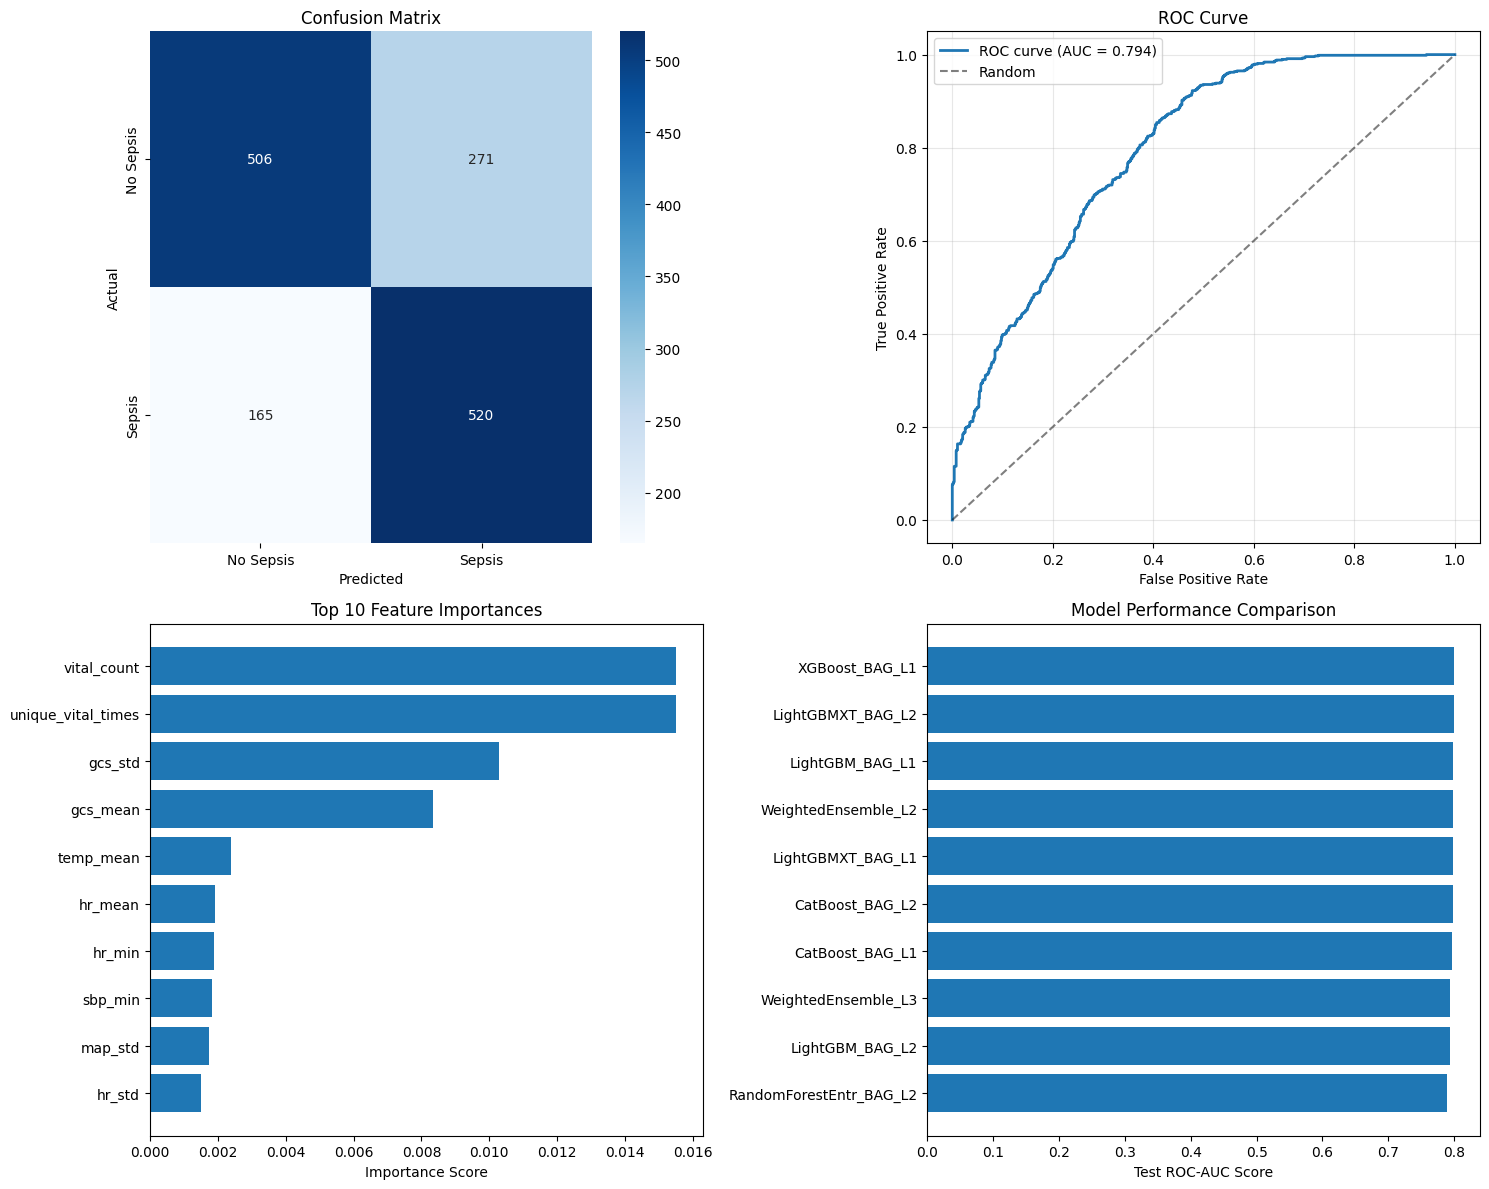

These features in provided data are not utilized by the predictor and will be ignored: ['is_male', 'gcs_min', 'gcs_max']
Computing feature importance via permutation shuffling for 45 features using 1462 rows with 35 shuffle sets...



10. Model Interpretation...

Feature importance (permutation-based):


	2966.29s	= Expected runtime (84.75s per shuffle set)


In [ ]:
# AutoGluon Sepsis Prediction Pipeline
# AutoGluon automatically handles missing values, feature engineering, and model selection

import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

# 1. Load the data
print("=" * 60)
print("1. Loading MIMIC-IV Sepsis Dataset...")
print("=" * 60)

df = pd.read_csv('/content/bquxjob_73282501_19811b4e38f.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

# Check class distribution
print(f"\nClass distribution:")
print(f"Sepsis cases (label=1): {df['label'].sum()}")
print(f"Non-sepsis cases (label=0): {len(df) - df['label'].sum()}")
print(f"Percentage sepsis: {df['label'].mean()*100:.1f}%")

# 2. Data Preparation
print("\n" + "=" * 60)
print("2. Preparing Data for AutoGluon...")
print("=" * 60)

# Convert label to string for AutoGluon (it handles classification better this way)
df['label'] = df['label'].map({0: 'no_sepsis', 1: 'sepsis'})

# Remove ID columns (AutoGluon will handle the rest)
id_cols = ['stay_id', 'subject_id']
df_model = df.drop(columns=id_cols)

# Show missing value statistics
print("\nMissing values per column:")
missing_stats = pd.DataFrame({
    'column': df_model.columns,
    'missing_count': df_model.isnull().sum(),
    'missing_pct': (df_model.isnull().sum() / len(df_model) * 100).round(2)
}).sort_values('missing_pct', ascending=False)
print(missing_stats[missing_stats['missing_pct'] > 0].head(10))

# 3. Train-Test Split
print("\n" + "=" * 60)
print("3. Splitting Data...")
print("=" * 60)

# Split data
train_data, test_data = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42,
    stratify=df_model['label']
)

print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")
print(f"\nTraining set class distribution:")
print(train_data['label'].value_counts())

# 4. AutoGluon Training - Quick Mode
print("\n" + "=" * 60)
print("4. Training AutoGluon Models (Quick Mode)...")
print("=" * 60)

# Create predictor with optimized settings for sepsis prediction
predictor_quick = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',  # Optimize for AUC
    path='autogluon_sepsis_quick'
)

# Train with quick preset (fast training, good for initial results)
predictor_quick.fit(
    train_data=train_data,
    time_limit=600,  # 5 minutes
    presets='best_quality',  # Use 'best_quality' for better results
    verbosity=2,
    ag_args_fit={
        'num_gpus': 1,  # Set to 1 if you have GPU
    }
)

# 5. Evaluate Quick Model
print("\n" + "=" * 60)
print("5. Evaluating Quick Model...")
print("=" * 60)

# Get predictions
y_test = test_data['label']
y_pred = predictor_quick.predict(test_data)
y_pred_proba = predictor_quick.predict_proba(test_data)['sepsis']

# Calculate metrics
test_auc = roc_auc_score(y_test == 'sepsis', y_pred_proba)
print(f"\nTest ROC-AUC: {test_auc:.4f}")

# Detailed evaluation
eval_metrics = predictor_quick.evaluate(test_data, silent=True)
print("\nDetailed metrics:")
for metric, value in eval_metrics.items():
    print(f"{metric}: {value:.4f}")

# 6. Model Leaderboard
print("\n" + "=" * 60)
print("6. Model Leaderboard...")
print("=" * 60)

leaderboard = predictor_quick.leaderboard(test_data, silent=True)
print("\nTop 5 models:")
print(leaderboard[['model', 'score_test', 'score_val', 'pred_time_test', 'fit_time']].head())

# 7. Feature Importance
print("\n" + "=" * 60)
print("7. Feature Importance Analysis...")
print("=" * 60)

importance = predictor_quick.feature_importance(test_data)
print("\nTop 15 most important features:")
print(importance.head(15))

# 8. Advanced Training (Optional - takes longer)
print("\n" + "=" * 60)
print("8. Training Advanced AutoGluon Models (Optional)...")
print("=" * 60)

# Uncomment the following section for more thorough training
"""
# Create advanced predictor
predictor_advanced = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',
    path='autogluon_sepsis_advanced'
)

# Define custom hyperparameters for better performance
hyperparameters = {
    'GBM': [
        {'num_boost_round': 100, 'learning_rate': 0.1},
        {'num_boost_round': 200, 'learning_rate': 0.05},
    ],
    'XGB': [
        {'n_estimators': 100, 'learning_rate': 0.1},
        {'n_estimators': 200, 'learning_rate': 0.05},
    ],
    'CAT': {},  # CatBoost
    'NN_TORCH': {},  # Neural Network
    'RF': [
        {'n_estimators': 100},
        {'n_estimators': 200},
    ],
}

# Train with custom settings
predictor_advanced.fit(
    train_data=train_data,
    time_limit=1800,  # 30 minutes
    presets='best_quality',
    hyperparameters=hyperparameters,
    num_bag_folds=5,  # 5-fold bagging
    num_stack_levels=1,  # Enable stacking
    verbosity=2
)

# Evaluate advanced model
y_pred_adv = predictor_advanced.predict(test_data)
y_pred_proba_adv = predictor_advanced.predict_proba(test_data)['sepsis']
test_auc_adv = roc_auc_score(y_test == 'sepsis', y_pred_proba_adv)
print(f"\nAdvanced Model Test ROC-AUC: {test_auc_adv:.4f}")
"""

# 9. Visualization
print("\n" + "=" * 60)
print("9. Creating Visualizations...")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 9.1 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['No Sepsis', 'Sepsis'],
            yticklabels=['No Sepsis', 'Sepsis'])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 9.2 ROC Curve
fpr, tpr, _ = roc_curve(y_test == 'sepsis', y_pred_proba)
axes[0, 1].plot(fpr, tpr, label=f'ROC curve (AUC = {test_auc:.3f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random', alpha=0.5)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 9.3 Feature Importance
top_features = importance.head(10)
axes[1, 0].barh(range(len(top_features)), top_features['importance'])
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features.index)
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_title('Top 10 Feature Importances')
axes[1, 0].invert_yaxis()

# 9.4 Model Performance Comparison
model_scores = leaderboard[['model', 'score_test']].head(10)
axes[1, 1].barh(range(len(model_scores)), model_scores['score_test'])
axes[1, 1].set_yticks(range(len(model_scores)))
axes[1, 1].set_yticklabels(model_scores['model'])
axes[1, 1].set_xlabel('Test ROC-AUC Score')
axes[1, 1].set_title('Model Performance Comparison')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('autogluon_sepsis_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. Model Interpretation
print("\n" + "=" * 60)
print("10. Model Interpretation...")
print("=" * 60)

# Get feature importance with different methods
print("\nFeature importance (permutation-based):")
try:
    perm_importance = predictor_quick.feature_importance(
        test_data,
        num_shuffle_sets=35,
        subsample_size=3000
    )
    print(perm_importance.head(10))
except:
    print("Permutation importance calculation skipped (may take long time)")

# 11. Save Predictions for Analysis
print("\n" + "=" * 60)
print("11. Saving Predictions...")
print("=" * 60)

# Create results dataframe
results = test_data.copy()
results['predicted'] = y_pred
results['sepsis_probability'] = y_pred_proba
results['correct'] = (results['label'] == results['predicted']).astype(int)

# Save high-risk patients
high_risk = results[results['sepsis_probability'] > 0.7].sort_values('sepsis_probability', ascending=False)
print(f"\nHigh-risk patients (probability > 0.7): {len(high_risk)}")

# Save results
results.to_csv('autogluon_predictions.csv', index=False)
print("Predictions saved to 'autogluon_predictions.csv'")

# 12. Production Deployment Example
print("\n" + "=" * 60)
print("12. Production Deployment Example...")
print("=" * 60)

def predict_sepsis_risk(patient_vitals, model_path='autogluon_sepsis_quick'):
    """
    Predict sepsis risk for new patients using trained AutoGluon model

    Args:
        patient_vitals: DataFrame with vital sign columns (can have missing values)
        model_path: Path to saved AutoGluon model

    Returns:
        DataFrame with predictions and risk scores
    """
    # Load predictor
    predictor = TabularPredictor.load(model_path)

    # Get predictions
    predictions = predictor.predict(patient_vitals)
    probabilities = predictor.predict_proba(patient_vitals)

    # Create results
    results = pd.DataFrame({
        'prediction': predictions,
        'sepsis_risk_score': probabilities['sepsis'],
        'risk_category': pd.cut(
            probabilities['sepsis'],
            bins=[0, 0.3, 0.7, 1.0],
            labels=['Low', 'Medium', 'High']
        )
    })

    return results

# Example usage
print("\nExample prediction for new patients:")
example_patients = pd.DataFrame({
    'hr_mean': [95, 120, 70],
    'sbp_mean': [110, 85, 130],
    'rr_mean': [18, 28, 16],
    'temp_mean': [37.2, 38.5, 36.8],
    'spo2_mean': [95, 88, 98],
    # ... other features (can be missing)
})

try:
    risk_scores = predict_sepsis_risk(example_patients)
    print(risk_scores)
except:
    print("Example requires all feature columns from training data")

# 13. Summary Report
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)
print(f"\n✅ Model Training Complete!")
print(f"📊 Best Model: {leaderboard.iloc[0]['model']}")
print(f"🎯 Test ROC-AUC: {test_auc:.4f}")
print(f"⏱️  Total Training Time: {leaderboard['fit_time'].sum():.1f} seconds")
print(f"💾 Model saved to: ./autogluon_sepsis_quick/")
print(f"\n🔮 This model predicts sepsis 12 hours before onset")
print(f"🏥 Based on vital signs from 15-minute windows")

# Print classification report
print("\n" + "=" * 60)
print("Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['No Sepsis', 'Sepsis']))

print("\n" + "=" * 60)
print("AutoGluon pipeline completed successfully!")
print("=" * 60)

In [ ]:
# AutoGluon Sepsis Prediction Pipeline
# AutoGluon automatically handles missing values, feature engineering, and model selection

import pandas as pd
import numpy as np
from autogluon.common import space
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

# 1. Load the data
print("=" * 60)
print("1. Loading MIMIC-IV Sepsis Dataset...")
print("=" * 60)

df = pd.read_csv('/content/bquxjob_73282501_19811b4e38f.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

# Check class distribution
print(f"\nClass distribution:")
print(f"Sepsis cases (label=1): {df['label'].sum()}")
print(f"Non-sepsis cases (label=0): {len(df) - df['label'].sum()}")
print(f"Percentage sepsis: {df['label'].mean()*100:.1f}%")

# 2. Data Preparation
print("\n" + "=" * 60)
print("2. Preparing Data for AutoGluon...")
print("=" * 60)

# Convert label to string for AutoGluon (it handles classification better this way)
df['label'] = df['label'].map({0: 'no_sepsis', 1: 'sepsis'})

# Remove ID columns (AutoGluon will handle the rest)
id_cols = ['stay_id', 'subject_id']
df_model = df.drop(columns=id_cols)

# Show missing value statistics
print("\nMissing values per column:")
missing_stats = pd.DataFrame({
    'column': df_model.columns,
    'missing_count': df_model.isnull().sum(),
    'missing_pct': (df_model.isnull().sum() / len(df_model) * 100).round(2)
}).sort_values('missing_pct', ascending=False)
print(missing_stats[missing_stats['missing_pct'] > 0].head(10))

# 3. Train-Test Split
print("\n" + "=" * 60)
print("3. Splitting Data...")
print("=" * 60)

# Split data
train_data, test_data = train_test_split(
    df_model,
    test_size=0.2,
    random_state=42,
    stratify=df_model['label']
)

print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")
print(f"\nTraining set class distribution:")
print(train_data['label'].value_counts())


# -----------------------------
# 4. AutoGluon Training with HPO
# -----------------------------

# 4.1 Define search spaces for each model family
hyperparameters = {
    'GBM': {  # LightGBM
        'learning_rate': space.Real(0.01, 0.2),
        'num_leaves':    space.Int(20, 128),
        'max_depth':     space.Int(3, 12),
    },
    'XGB': {  # XGBoost
        'learning_rate': space.Real(0.01, 0.3),
        'max_depth':     space.Int(3, 10),
    },
    'CAT': {  # CatBoost
        'learning_rate': space.Real(0.01, 0.2),
        'depth':         space.Int(4, 10),
        'l2_leaf_reg':   space.Real(1, 10),
    },
    'RF': {   # Random Forest
        'n_estimators':  space.Int(50, 300),
        'max_depth':     space.Int(5, 20),
    },
    'NN_TORCH': {  # Simple MLP
        'learning_rate':    space.Real(1e-4, 1e-2),
        'hidden_size':      space.Int(64, 256),
        'dropout_prob':     space.Real(0.0, 0.5),
        'num_layers':       space.Int(1, 3),
    }
}

# 4.2 Create predictor with HPO enabled
predictor = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',
    path='autogluon_sepsis_hpo'
)

# 4.3 Fit with hyperparameter tuning
predictor.fit(
    train_data=train_data,
    time_limit=1800,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs={'num_trials': 50},
    verbosity=2,
    ag_args_fit={'num_gpus': 1}
)


# 5. Evaluate Tuned Model
print("\n" + "=" * 60)
print("5. Evaluating Tuned Model...")
print("=" * 60)

# Get predictions
y_test = test_data['label']
y_pred = predictor.predict(test_data)
y_pred_proba = predictor.predict_proba(test_data)['sepsis']

# Calculate metrics
test_auc = roc_auc_score(y_test == 'sepsis', y_pred_proba)
print(f"\nTest ROC-AUC: {test_auc:.4f}")

# Detailed evaluation
eval_metrics = predictor.evaluate(test_data, silent=True)
print("\nDetailed metrics:")
for metric, value in eval_metrics.items():
    print(f"{metric}: {value:.4f}")

# 6. Model Leaderboard
print("\n" + "=" * 60)
print("6. Model Leaderboard...")
print("=" * 60)

leaderboard = predictor.leaderboard(test_data, silent=True)
print("\nTop 5 models:")
print(leaderboard[['model', 'score_test', 'score_val', 'pred_time_test', 'fit_time']].head())

# 7. Feature Importance
print("\n" + "=" * 60)
print("7. Feature Importance Analysis...")
print("=" * 60)

importance = predictor.feature_importance(test_data)
print("\nTop 15 most important features:")
print(importance.head(15))

# 8. Advanced Training (Optional - takes longer)
print("\n" + "=" * 60)
print("8. Training Advanced AutoGluon Models (Optional)...")
print("=" * 60)

# Uncomment the following section for more thorough training

# Create advanced predictor
predictor_advanced = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',
    path='autogluon_sepsis_advanced'
)

# Define custom hyperparameters for better performance
hyperparameters_advanced = {
    'GBM': [
        {'num_boost_round': 100, 'learning_rate': 0.1},
        {'num_boost_round': 200, 'learning_rate': 0.05},
    ],
    'XGB': [
        {'n_estimators': 100, 'learning_rate': 0.1},
        {'n_estimators': 200, 'learning_rate': 0.05},
    ],
    'CAT': {},  # CatBoost
    'NN_TORCH': {},  # Neural Network
    'RF': [
        {'n_estimators': 100},
        {'n_estimators': 200},
    ],
}

# Train with custom settings
predictor_advanced.fit(
    train_data=train_data,
    time_limit=600,  # 30 minutes
    presets='best_quality',
    hyperparameters=hyperparameters_advanced,
    num_bag_folds=5,  # 5-fold bagging
    num_stack_levels=1,  # Enable stacking
    verbosity=2
)

# Evaluate advanced model
y_pred_adv = predictor_advanced.predict(test_data)
y_pred_proba_adv = predictor_advanced.predict_proba(test_data)['sepsis']
test_auc_adv = roc_auc_score(y_test == 'sepsis', y_pred_proba_adv)
print(f"\nAdvanced Model Test ROC-AUC: {test_auc_adv:.4f}")


# 9. Visualization
print("\n" + "=" * 60)
print("9. Creating Visualizations...")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 9.1 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['No Sepsis', 'Sepsis'],
            yticklabels=['No Sepsis', 'Sepsis'])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 9.2 ROC Curve
fpr, tpr, _ = roc_curve(y_test == 'sepsis', y_pred_proba)
axes[0, 1].plot(fpr, tpr, label=f'ROC curve (AUC = {test_auc:.3f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random', alpha=0.5)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 9.3 Feature Importance
top_features = importance.head(10)
axes[1, 0].barh(range(len(top_features)), top_features['importance'])
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features.index)
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_title('Top 10 Feature Importances')
axes[1, 0].invert_yaxis()

# 9.4 Model Performance Comparison
model_scores = leaderboard[['model', 'score_test']].head(10)
axes[1, 1].barh(range(len(model_scores)), model_scores['score_test'])
axes[1, 1].set_yticks(range(len(model_scores)))
axes[1, 1].set_yticklabels(model_scores['model'])
axes[1, 1].set_xlabel('Test ROC-AUC Score')
axes[1, 1].set_title('Model Performance Comparison')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('autogluon_sepsis_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. Model Interpretation
print("\n" + "=" * 60)
print("10. Model Interpretation...")
print("=" * 60)

# Get feature importance with different methods
print("\nFeature importance (permutation-based):")
try:
    perm_importance = predictor.feature_importance(
        test_data,
        num_shuffle_sets=35,
        subsample_size=5000
    )
    print(perm_importance.head(10))
except:
    print("Permutation importance calculation skipped (may take long time)")

# 11. Save Predictions for Analysis
print("\n" + "=" * 60)
print("11. Saving Predictions...")
print("=" * 60)

# Create results dataframe
results = test_data.copy()
results['predicted'] = y_pred
results['sepsis_probability'] = y_pred_proba
results['correct'] = (results['label'] == results['predicted']).astype(int)

# Save high-risk patients
high_risk = results[results['sepsis_probability'] > 0.7].sort_values('sepsis_probability', ascending=False)
print(f"\nHigh-risk patients (probability > 0.7): {len(high_risk)}")

# Save results
results.to_csv('autogluon_predictions.csv', index=False)
print("Predictions saved to 'autogluon_predictions.csv'")

# 12. Production Deployment Example
print("\n" + "=" * 60)
print("12. Production Deployment Example...")
print("=" * 60)

def predict_sepsis_risk(patient_vitals, model_path='autogluon_sepsis_hpo'):
    """
    Predict sepsis risk for new patients using trained AutoGluon model

    Args:
        patient_vitals: DataFrame with vital sign columns (can have missing values)
        model_path: Path to saved AutoGluon model

    Returns:
        DataFrame with predictions and risk scores
    """
    # Load predictor
    predictor = TabularPredictor.load(model_path)

    # Get predictions
    predictions = predictor.predict(patient_vitals)
    probabilities = predictor.predict_proba(patient_vitals)

    # Create results
    results = pd.DataFrame({
        'prediction': predictions,
        'sepsis_risk_score': probabilities['sepsis'],
        'risk_category': pd.cut(
            probabilities['sepsis'],
            bins=[0, 0.3, 0.7, 1.0],
            labels=['Low', 'Medium', 'High']
        )
    })

    return results

# Example usage
print("\nExample prediction for new patients:")
example_patients = pd.DataFrame({
    'hr_mean': [95, 120, 70],
    'sbp_mean': [110, 85, 130],
    'rr_mean': [18, 28, 16],
    'temp_mean': [37.2, 38.5, 36.8],
    'spo2_mean': [95, 88, 98],
    # ... other features (can be missing)
})

try:
    risk_scores = predict_sepsis_risk(example_patients)
    print(risk_scores)
except Exception as e:
    print(f"Example requires all feature columns from training data. Error: {e}")

# 13. Summary Report
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)
# The leaderboard is only available after fitting the model, so we check if the predictor has been fit
if predictor.get_model_names():
    leaderboard = predictor.leaderboard(test_data, silent=True)
    print(f"\n✅ Model Training Complete!")
    print(f"📊 Best Model: {leaderboard.iloc[0]['model']}")
    print(f"🎯 Test ROC-AUC: {test_auc:.4f}")
    print(f"⏱️  Total Training Time: {leaderboard['fit_time'].sum():.1f} seconds")
    print(f"💾 Model saved to: ./autogluon_sepsis_hpo/")
else:
    print("\n❌ Model Training Failed!")


print(f"\n🔮 This model predicts sepsis 12 hours before onset")
print(f"🏥 Based on vital signs from 15-minute windows")

# Print classification report
print("\n" + "=" * 60)
print("Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['No Sepsis', 'Sepsis']))

print("\n" + "=" * 60)
print("AutoGluon pipeline completed successfully!")
print("=" * 60)

In [7]:
# AutoGluon Sepsis Prediction Pipeline
# AutoGluon automatically handles missing values, feature engineering, and HPO

import pandas as pd
import numpy as np
from autogluon.common import space
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
np.random.seed(42)

# 1. Load data
print("=" * 60)
print("1. Loading MIMIC-IV Sepsis Dataset...")
print("=" * 60)
df = pd.read_csv('/content/bquxjob_73282501_19811b4e38f.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Class balance
print(f"\nSepsis cases: {df['label'].sum()}, non‐sepsis: {len(df)-df['label'].sum()} ({df['label'].mean()*100:.1f}% sepsis)")

# 2. Prepare data
print("\n" + "=" * 60)
print("2. Preparing data...")
print("=" * 60)
df['label'] = df['label'].map({0: 'no_sepsis', 1: 'sepsis'})
df_model = df.drop(columns=['stay_id', 'subject_id'])

# Missing‐value report
missing = df_model.isnull().sum() / len(df_model) * 100
print("\nColumns with missing data (>0%):")
print(missing[missing>0].sort_values(ascending=False).head(10).round(2))

# 3. Train/test split
print("\n" + "=" * 60)
print("3. Splitting data...")
print("=" * 60)
train_data, test_data = train_test_split(
    df_model, test_size=0.2, random_state=42, stratify=df_model['label']
)
print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")
print("Train label counts:")
print(train_data['label'].value_counts())

# 4. AutoGluon training with full HPO
from autogluon.common import space
from autogluon.tabular import TabularPredictor

hyperparameters = {
    'GBM': {
        'learning_rate': space.Real(0.01, 0.2),
        'num_leaves':    space.Int(20, 128),
        'max_depth':     space.Int(3, 12),
    },
    'XGB': {
        'learning_rate': space.Real(0.01, 0.3),
        'max_depth':     space.Int(3, 10),
    },
    'CAT': {
        'learning_rate': space.Real(0.01, 0.2),
        'depth':         space.Int(4, 10),
        'l2_leaf_reg':   space.Real(1, 10),
    },
    'RF': {
        'n_estimators':  space.Int(50, 300),
        'max_depth':     space.Int(5, 20),
    },
    'NN_TORCH': {
        'learning_rate': space.Real(1e-4, 1e-2),
        'hidden_size':   space.Int(64, 256),
        'dropout_prob':  space.Real(0.0, 0.5),
        'num_layers':    space.Int(1, 3),
    },
}

predictor = TabularPredictor(
    label='label',
    problem_type='binary',
    eval_metric='roc_auc',
    path='autogluon_sepsis_hpo'
)

predictor.fit(
    train_data=train_data,
    time_limit=1800,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs={
        'num_trials': 50,
        'scheduler':  'asha',
        'searcher':   'random',
    },
    verbosity=2,
    ag_args_fit={'num_gpus': 1}

)

# 5. Evaluation
print("\n" + "=" * 60)
print("5. Evaluating tuned model...")
print("=" * 60)
y_test = test_data['label']
y_pred = predictor.predict(test_data)
y_proba = predictor.predict_proba(test_data)['sepsis']
auc = roc_auc_score(y_test=='sepsis', y_proba)
print(f"Test ROC-AUC = {auc:.4f}")

metrics = predictor.evaluate(test_data, silent=True)
print("\nDetailed metrics:")
for m,v in metrics.items():
    print(f"  {m}: {v:.4f}")

# 6. Leaderboard
print("\n" + "=" * 60)
print("6. Model leaderboard:")
print("=" * 60)
leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard[['model','score_test','score_val','pred_time_test','fit_time']].head())

# 7. Feature importance
print("\n" + "=" * 60)
print("7. Feature importance (permutation):")
print("=" * 60)
fi = predictor.feature_importance(test_data)
print(fi.head(15))

# 8. Visualizations (pure matplotlib)
print("\n" + "=" * 60)
print("8. Plotting results...")
print("=" * 60)
fig, axes = plt.subplots(2,2,figsize=(14,10))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['no_sepsis','sepsis'])
axes[0,0].imshow(cm, interpolation='nearest')
for i in (0,1):
    for j in (0,1):
        axes[0,0].text(j, i, cm[i,j], ha='center', va='center')
axes[0,0].set_xticks([0,1]); axes[0,0].set_yticks([0,1])
axes[0,0].set_xticklabels(['No','Yes']); axes[0,0].set_yticklabels(['No','Yes'])
axes[0,0].set_title('Confusion Matrix'); axes[0,0].set_xlabel('Predicted'); axes[0,0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test=='sepsis', y_proba)
axes[0,1].plot(fpr,tpr, label=f"AUC={auc:.3f}")
axes[0,1].plot([0,1],[0,1],'--')
axes[0,1].set_title('ROC Curve'); axes[0,1].set_xlabel('FPR'); axes[0,1].set_ylabel('TPR')
axes[0,1].legend()

# Top-10 feature importances
top10 = fi.head(10)
axes[1,0].barh(range(len(top10)), top10['importance'])
axes[1,0].set_yticks(range(len(top10))); axes[1,0].set_yticklabels(top10.index)
axes[1,0].invert_yaxis(); axes[1,0].set_title('Top 10 Features')

# Top-10 model scores
top_models = leaderboard.head(10)
axes[1,1].barh(range(len(top_models)), top_models['score_test'])
axes[1,1].set_yticks(range(len(top_models))); axes[1,1].set_yticklabels(top_models['model'])
axes[1,1].invert_yaxis(); axes[1,1].set_title('Top 10 Models by ROC-AUC')

plt.tight_layout()
plt.show()

# 9. Save predictions
print("\n" + "=" * 60)
print("9. Saving predictions...")
print("=" * 60)
results = test_data.copy()
results['pred'] = y_pred
results['proba'] = y_proba
results.to_csv('autogluon_sepsis_predictions.csv', index=False)
print("-> autogluon_sepsis_predictions.csv written.")

# 10. Classification report
print("\n" + "=" * 60)
print("10. Classification report:")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['No Sepsis','Sepsis']))

# 11. (Optional) production predictor function...


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.94 GB / 12.67 GB (86.3%)
Disk Space Avail:   69.96 GB / 112.64 GB (62.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stack

1. Loading MIMIC-IV Sepsis Dataset...
Dataset shape: (7309, 51)
Columns: ['stay_id', 'subject_id', 'label', 'admission_age', 'is_elderly', 'gender', 'is_male', 'hr_mean', 'hr_min', 'hr_max', 'hr_std', 'hr_mean_age_adjusted', 'sbp_mean', 'sbp_min', 'sbp_max', 'sbp_std', 'dbp_mean', 'dbp_min', 'dbp_max', 'dbp_std', 'map_mean', 'map_min', 'map_max', 'map_std', 'rr_mean', 'rr_min', 'rr_max', 'rr_std', 'temp_mean', 'temp_min', 'temp_max', 'temp_std', 'temp_mean_f', 'temp_max_f', 'spo2_mean', 'spo2_min', 'spo2_max', 'spo2_std', 'gcs_mean', 'gcs_min', 'gcs_max', 'gcs_std', 'shock_index_mean', 'shock_index_max', 'pulse_pressure_mean', 'pulse_pressure_min', 'pulse_pressure_max', 'age_hr_interaction', 'age_sbp_interaction', 'vital_count', 'unique_vital_times']

Sepsis cases: 3425, non‐sepsis: 3884 (46.9% sepsis)

2. Preparing data...

Columns with missing data (>0%):
gcs_mean       78.57
gcs_std        78.57
gcs_min        78.57
gcs_max        78.57
temp_max       76.95
temp_min       76.95
temp

	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2025-07-16 20:00:36,218	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
		Context path: "/content/autogluon_sepsis_hpo/ds_sub_fit/sub_fit_ho"
(_dystack pid=11508) Running DyStack sub-fit ...
(_dystack pid=11508) Beginning AutoGluon training ... Time limit = 445s
(_dystack pid=11508) AutoGluon will save models to "/content/autogluon_sepsis_hpo/ds_sub_fit/sub_fit_ho"
(_dystack pid=11508) Train Data Rows:    5197
(_dystack pid=11508) Train Data Columns: 48
(_dystack pid=11508) Label Column:       label
(_dystack pid=11508) Problem Type:       binary
(_dystack pid=11508) Preprocessing data ...
(_dystack pid=11508) Selected class <--> label mapping:  class 1 = sepsis, class 0 = no_sepsis
(_dystack pid=11508) 	Note: For your binary classification, A

RuntimeError: No models were trained successfully during fit(). Inspect the log output or increase verbosity to determine why no models were fit. Alternatively, set `raise_on_no_models_fitted` to False during the fit call.